In [47]:
import pandas as pd
import numpy as np
import spacy
from spacy import displacy
import networkx as nx
import matplotlib.pyplot as plt

In [9]:
!python3 -m spacy download en_core_web_sm

     --------------------------------------- 12.8/12.8 MB 17.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


You should consider upgrading via the 'C:\Users\sidah\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [15]:
# Load spacy english model
NER = spacy.load("en_core_web_sm")

In [16]:
import os

all_books = [b for b in os.scandir("data") if '.txt' in b.name]

In [17]:
all_books

[<DirEntry '1 The Last Wish.txt'>,
 <DirEntry '2 The Sword of Destiny.txt'>,
 <DirEntry '3 Blood of Elves.txt'>,
 <DirEntry '4 Times of Contempt.txt'>,
 <DirEntry '5 Baptism of Fire.txt'>,
 <DirEntry '6 The Tower of the Swallow.txt'>,
 <DirEntry '7 The Lady of the Lake.txt'>,
 <DirEntry '8 something ends something begins.txt'>]

In [18]:
book = all_books[0]
book_text = open(book).read()
book_doc = NER(book_text)

In [19]:
displacy.render(book_doc[0:2000],style="ent",jupyter=True)

In [20]:
#Read Characters
character_df = pd.read_csv("characters.csv")

In [22]:
# Remove brackets and text within brackets
import re
character_df['character'] = character_df['character'].apply(lambda x: re.sub("[\(.*?[\)]","",x))
character_df['character_firstname'] = character_df['character'].apply(lambda x: x.split(' ', 1)[0])

In [23]:
pd.set_option('display.max_rows',None)
character_df

,book,character,character_firstname
0,Category:Baptism of Fire characters,Adalia,Adalia
1,Category:Baptism of Fire characters,Adela,Adela
2,Category:Baptism of Fire characters,Aen Saevherne,Aen
3,Category:Baptism of Fire characters,Aevenien,Aevenien
4,Category:Baptism of Fire characters,Aglaïs,Aglaïs
5,Category:Baptism of Fire characters,Albrich,Albrich
6,Category:Baptism of Fire characters,Amavet,Amavet
7,Category:Baptism of Fire characters,Angus Bri Cri,Angus
8,Category:Baptism of Fire characters,Anna Kameny,Anna
9,Category:Baptism of Fire characters,Anzelm Aubry,Anzelm


In [24]:
sent_entity_df = []

for sent in book_doc.sents:
    entity_list = [ ent.text for ent in sent.ents]
    sent_entity_df.append({"sentence": sent, "entities": entity_list})


sent_entity_df = pd.DataFrame(sent_entity_df)

In [25]:
sent_entity_df

,sentence,entities
0,"(ï»¿'Does, she, always, devour, her, victims, ...",[]
1,"(\n\n, Velerad, spat, vehemently, on, the, str...",[Velerad]
2,"(\n\n, ', Come, on, ,, Geralt, ,, it, 'll, be,...",[Geralt]
3,"(Pish, !)",[]
4,"(Devours, ,, takes, a, bite, ,, leaves, aside,...",[]
5,"(She, only, bit, the, head, from, one, ,, gutt...",[]
6,"(Damned, mother's-, !, ')",[]
7,"(\n\n, ', Careful, ,, Velerad, ,, ', snarled, ...","[Velerad, Ostrit]"
8,"(', Say, what, you, want, about, the, striga, ...",[Adda]
9,"(\n\n, ', Has, anyone, she, 's, attacked, surv...",[]


In [26]:
def filter_entity (ent_list, character_df):
    return [ ent for ent in ent_list
    if ent in list(character_df.character)
    or ent in list(character_df.character_firstname)]

In [28]:
sent_entity_df['character_entities'] = sent_entity_df['entities'].apply(lambda x: filter_entity(x, character_df))
sent_entity_df_filtered= sent_entity_df[sent_entity_df['character_entities'].map(len) > 0]
sent_entity_df_filtered.head(10)

,sentence,entities,character_entities
1,"(\n\n, Velerad, spat, vehemently, on, the, str...",[Velerad],[Velerad]
2,"(\n\n, ', Come, on, ,, Geralt, ,, it, 'll, be,...",[Geralt],[Geralt]
7,"(\n\n, ', Careful, ,, Velerad, ,, ', snarled, ...","[Velerad, Ostrit]","[Velerad, Ostrit]"
8,"(', Say, what, you, want, about, the, striga, ...",[Adda],[Adda]
11,"(\n\n, Segelin, and, Ostrit, looked, at, each,...","[Segelin, Ostrit]","[Segelin, Ostrit]"
14,"(One, escaped-, ', \n\n, And, then, ,, ', inte...","[One, Velerad]",[Velerad]
23,"(\n\n, Having, finished, his, examination, Ger...",[Geralt],[Geralt]
25,"(It, was, Foltest, himself, .)",[Foltest],[Foltest]
59,"(\n\n, Yes, ,, ', Foltest, bristled, .)",[Foltest],[Foltest]
70,"(Geralt, grimaced, .)",[Geralt],[Geralt]


In [29]:
sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0] for item in x])

C:\Users\sidah\AppData\Local\Temp\ipykernel_11988\3486705514.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0] for item in x])


In [31]:
pd.reset_option('^display.', silent=True)
sent_entity_df_filtered

,sentence,entities,character_entities
1,"(\n\n, Velerad, spat, vehemently, on, the, str...",[Velerad],[Velerad]
2,"(\n\n, ', Come, on, ,, Geralt, ,, it, 'll, be,...",[Geralt],[Geralt]
7,"(\n\n, ', Careful, ,, Velerad, ,, ', snarled, ...","[Velerad, Ostrit]","[Velerad, Ostrit]"
8,"(', Say, what, you, want, about, the, striga, ...",[Adda],[Adda]
11,"(\n\n, Segelin, and, Ostrit, looked, at, each,...","[Segelin, Ostrit]","[Segelin, Ostrit]"
...,...,...,...
8913,"(Nenneke, ,, growing, red, with, the, effort, ...",[Nenneke],[Nenneke]
8916,"(Nenneke, raised, herself, to, her, knees, and...",[Nenneke],[Nenneke]
8922,"(\n\n, She, turned, to, Geralt, .)",[Geralt],[Geralt]
8925,"(Iola-, ', \n\n, ', Do, n't, say, anything, ,,...",[Nenneke],[Nenneke]


In [35]:
window_size = 5
relationships = []
for i in range(sent_entity_df_filtered.index[-1]):
    end_i = min(i + 5, sent_entity_df_filtered.index[-1])
    char_list = sum((sent_entity_df_filtered.loc[i: end_i].character_entities), [])
    char_unique = [char_list[i] for i in range(len(char_list)) if i == 0 or char_list[i] != char_list[i-1]]

    for idx, a in enumerate(char_unique[:-1]):
        b = char_unique[idx + 1]
        relationships.append({"source" : a, "target": b})

In [36]:
relationship_df = pd.DataFrame(relationships)

In [37]:
pd.set_option("display.max_rows", None)
relationship_df

,source,target
0,Velerad,Geralt
1,Velerad,Geralt
2,Geralt,Velerad
3,Velerad,Ostrit
4,Velerad,Ostrit
5,Ostrit,Adda
6,Velerad,Ostrit
7,Ostrit,Adda
8,Velerad,Ostrit
9,Ostrit,Adda


In [38]:
relationship_df = pd.DataFrame(np.sort(relationship_df.values, axis = 1) , columns = relationship_df.columns)
relationship_df

,source,target
0,Geralt,Velerad
1,Geralt,Velerad
2,Geralt,Velerad
3,Ostrit,Velerad
4,Ostrit,Velerad
5,Adda,Ostrit
6,Ostrit,Velerad
7,Adda,Ostrit
8,Ostrit,Velerad
9,Adda,Ostrit


In [39]:
relationship_df["value"] = 1
relationship_df = relationship_df.groupby(["source","target"],sort=False,as_index= False ).sum()


In [40]:
relationship_df.head(10)

,source,target,value
0,Geralt,Velerad,9
1,Ostrit,Velerad,9
2,Adda,Ostrit,5
3,Adda,Segelin,3
4,Ostrit,Segelin,6
5,Foltest,Geralt,9
6,Adda,Foltest,4
7,Geralt,Ostrit,15
8,Segelin,Velerad,6
9,Foltest,Velerad,6


In [50]:
G = nx.from_pandas_edgelist(relationship_df,source= "source", target = "target", edge_attr = "value",
create_using = nx.Graph())

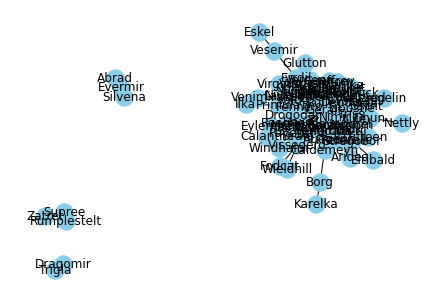

In [51]:
pos = nx.kamada_kawai_layout(G)
nx.draw(G,with_labels=True,node_color ="skyblue")

In [56]:
from pyvis.network import Network
net = Network(notebook = True, width="1000px", height="700px", bgcolor='#222222', font_color='white')

node_degree = dict(G.degree)
nx.set_node_attributes(G,node_degree,'size')

net.from_nx(G)
net.show("witcher.html")

In [57]:
degree_dict = nx.degree_centrality(G)
degree_dict

{'Geralt': 0.6976744186046512,
 'Velerad': 0.046511627906976744,
 'Ostrit': 0.046511627906976744,
 'Adda': 0.046511627906976744,
 'Segelin': 0.03488372093023256,
 'Foltest': 0.03488372093023256,
 'Nenneke': 0.06976744186046512,
 'Iola': 0.03488372093023256,
 'Roach': 0.046511627906976744,
 'Rulle': 0.023255813953488372,
 'Two': 0.08139534883720931,
 'Nivellen': 0.06976744186046512,
 'Fenne': 0.023255813953488372,
 'Primula': 0.03488372093023256,
 'Ilka': 0.011627906976744186,
 'Venimira': 0.011627906976744186,
 'Glutton': 0.023255813953488372,
 'Vereena': 0.046511627906976744,
 'Falwick': 0.05813953488372093,
 'Hereward': 0.03488372093023256,
 'Dragomir': 0.011627906976744186,
 'Trigla': 0.011627906976744186,
 'Caldemeyn': 0.046511627906976744,
 'Borg': 0.023255813953488372,
 'Karelka': 0.011627906976744186,
 'Irion': 0.011627906976744186,
 'Stregobor': 0.046511627906976744,
 'Zavist': 0.011627906976744186,
 'Evermir': 0.023255813953488372,
 'Silvena': 0.011627906976744186,
 'Abrad': 0

<AxesSubplot:>

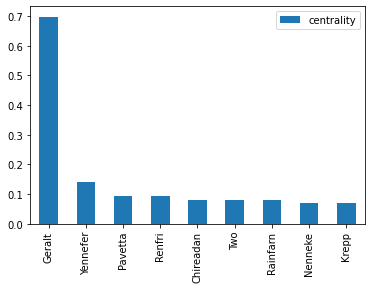

In [59]:
degree_df = pd.DataFrame.from_dict(degree_dict,orient='index',columns=['centrality'])

degree_df.sort_values('centrality',ascending=False)[0:9].plot(kind='bar')

<AxesSubplot:>

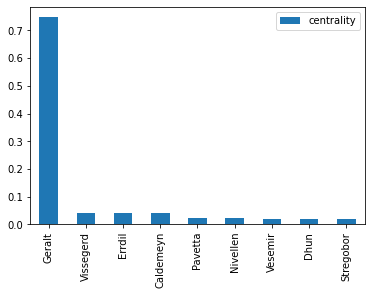

In [62]:
betweeness_dict = nx.betweenness_centrality(G)
degree_df = pd.DataFrame.from_dict(betweeness_dict,orient='index',columns=['centrality'])

degree_df.sort_values('centrality',ascending=False)[0:9].plot(kind='bar')

<AxesSubplot:>

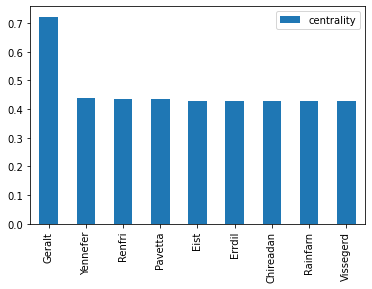

In [63]:
closeness_dict = nx.closeness_centrality(G)
degree_df = pd.DataFrame.from_dict(closeness_dict,orient='index',columns=['centrality'])

degree_df.sort_values('centrality',ascending=False)[0:9].plot(kind='bar')

In [64]:
nx.set_node_attributes(G,degree_dict,"degree_centrality")
nx.set_node_attributes(G,betweeness_dict,"betweeness_centrality")
nx.set_node_attributes(G,closeness_dict,"closeness_centrality")

In [66]:
import  community as community_louvain

In [67]:
communities = community_louvain.best_partition(G)

In [68]:
communities

{'Geralt': 2,
 'Velerad': 6,
 'Ostrit': 6,
 'Adda': 6,
 'Segelin': 6,
 'Foltest': 6,
 'Nenneke': 2,
 'Iola': 2,
 'Roach': 3,
 'Rulle': 4,
 'Two': 4,
 'Nivellen': 3,
 'Fenne': 3,
 'Primula': 3,
 'Ilka': 3,
 'Venimira': 3,
 'Glutton': 3,
 'Vereena': 3,
 'Falwick': 2,
 'Hereward': 2,
 'Dragomir': 7,
 'Trigla': 7,
 'Caldemeyn': 8,
 'Borg': 8,
 'Karelka': 8,
 'Irion': 2,
 'Stregobor': 8,
 'Zavist': 2,
 'Evermir': 0,
 'Silvena': 0,
 'Abrad': 0,
 'Fredefalk': 8,
 'Aridea': 8,
 'Renfri': 8,
 'Eltibald': 8,
 'Nimir': 8,
 'Nohorn': 8,
 'Tavik': 8,
 'Fifteen': 8,
 'Civril': 8,
 'Audoen': 8,
 'Libushe': 2,
 'Marilka': 2,
 'Yennefer': 10,
 'Haxo': 1,
 'Roegner': 1,
 'Drogodar': 4,
 'Rainfarn': 1,
 'Eylembert': 4,
 'Eist': 1,
 'Pavetta': 1,
 'Draig': 1,
 'Vissegerd': 1,
 'Fodcat': 1,
 'Wieldhill': 1,
 'Mousesack': 1,
 'Calanthe': 1,
 'Windhalm': 1,
 'Supree': 5,
 'Zatret': 5,
 'Rumplestelt': 5,
 'Ravix': 1,
 'Roderick': 2,
 'Millet': 2,
 'Dhun': 9,
 'Lille': 9,
 'Nettly': 9,
 'Galarr': 9,
 'Torque':

In [69]:
nx.set_node_attributes(G,communities,'group')

In [71]:
com_net = Network(notebook=True, width='1000px', height="700px", bgcolor="#222222", font_color='white')
com_net.from_nx(G)
com_net.show("witcher_communities.html")